In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Churn Prediction with PySpark").getOrCreate()

filepath1=("/FileStore/tables/churn_bigml_80-2.csv")
filepath2=("/FileStore/tables/churn_bigml_20-2.csv")
CV_data = spark.read.csv(filepath1, header='true', inferSchema='true')
final_test_data = spark.read.csv(filepath2, header='true', inferSchema='true')
CV_data.printSchema()

root
 |-- State: string (nullable = true)
 |-- Account length: integer (nullable = true)
 |-- Area code: integer (nullable = true)
 |-- International plan: string (nullable = true)
 |-- Voice mail plan: string (nullable = true)
 |-- Number vmail messages: integer (nullable = true)
 |-- Total day minutes: double (nullable = true)
 |-- Total day calls: integer (nullable = true)
 |-- Total day charge: double (nullable = true)
 |-- Total eve minutes: double (nullable = true)
 |-- Total eve calls: integer (nullable = true)
 |-- Total eve charge: double (nullable = true)
 |-- Total night minutes: double (nullable = true)
 |-- Total night calls: integer (nullable = true)
 |-- Total night charge: double (nullable = true)
 |-- Total intl minutes: double (nullable = true)
 |-- Total intl calls: integer (nullable = true)
 |-- Total intl charge: double (nullable = true)
 |-- Customer service calls: integer (nullable = true)
 |-- Churn: boolean (nullable = true)



In [0]:
print("The training dataset contains {} samples.".format(CV_data.count()))
print("The test dataset contains {} samples.".format(final_test_data.count()))


The training dataset contains 2666 samples.
The test dataset contains 667 samples.


In [0]:
CV_data.select("*").toPandas().head().transpose()

0 
 1 
 2 
 3 
 4 
 
 
 
 
 State 
 KS 
 OH 
 NJ 
 OH 
 OK 
 
 
 Account length 
 128 
 107 
 137 
 84 
 75 
 
 
 Area code 
 415 
 415 
 415 
 408 
 415 
 
 
 International plan 
 No 
 No 
 No 
 Yes 
 Yes 
 
 
 Voice mail plan 
 Yes 
 Yes 
 No 
 No 
 No 
 
 
 Number vmail messages 
 25 
 26 
 0 
 0 
 0 
 
 
 Total day minutes 
 265.1 
 161.6 
 243.4 
 299.4 
 166.7 
 
 
 Total day calls 
 110 
 123 
 114 
 71 
 113 
 
 
 Total day charge 
 45.07 
 27.47 
 41.38 
 50.9 
 28.34 
 
 
 Total eve minutes 
 197.4 
 195.5 
 121.2 
 61.9 
 148.3 
 
 
 Total eve calls 
 99 
 103 
 110 
 88 
 122 
 
 
 Total eve charge 
 16.78 
 16.62 
 10.3 
 5.26 
 12.61 
 
 
 Total night minutes 
 244.7 
 254.4 
 162.6 
 196.9 
 186.9 
 
 
 Total night calls 
 91 
 103 
 104 
 89 
 121 
 
 
 Total night charge 
 11.01 
 11.45 
 7.32 
 8.86 
 8.41 
 
 
 Total intl minutes 
 10.0 
 13.7 
 12.2 
 6.6 
 10.1 
 
 
 Total intl calls 
 3 
 3 
 5 
 7 
 3 
 
 
 Total intl charge 
 2.7 
 3.7 
 3.29 
 1.78 
 2.73 
 
 
 Customer service calls 
 1 
 1 
 0 
 2 
 3 
 
 
 Churn 
 False 
 False 
 False 
 False 
 False

In [0]:
numeric_features = [t[0] for t in CV_data.dtypes if t[1] == 'int' or t[1] == 'double']

CV_data.describe(numeric_features).toPandas().transpose()

0 
 1 
 2 
 3 
 4 
 
 
 
 
 summary 
 count 
 mean 
 stddev 
 min 
 max 
 
 
 Account length 
 2666 
 100.62040510127532 
 39.56397365334985 
 1 
 243 
 
 
 Area code 
 2666 
 437.43885971492875 
 42.521018019427174 
 408 
 510 
 
 
 Number vmail messages 
 2666 
 8.021755438859715 
 13.61227701829193 
 0 
 50 
 
 
 Total day minutes 
 2666 
 179.48162040510135 
 54.21035022086982 
 0.0 
 350.8 
 
 
 Total day calls 
 2666 
 100.31020255063765 
 19.988162186059512 
 0 
 160 
 
 
 Total day charge 
 2666 
 30.512404351087813 
 9.215732907163497 
 0.0 
 59.64 
 
 
 Total eve minutes 
 2666 
 200.38615903976006 
 50.95151511764598 
 0.0 
 363.7 
 
 
 Total eve calls 
 2666 
 100.02363090772693 
 20.16144511531889 
 0 
 170 
 
 
 Total eve charge 
 2666 
 17.033072018004518 
 4.330864176799864 
 0.0 
 30.91 
 
 
 Total night minutes 
 2666 
 201.16894223555968 
 50.780323368725206 
 43.7 
 395.0 
 
 
 Total night calls 
 2666 
 100.10615153788447 
 19.418458551101697 
 33 
 166 
 
 
 Total night charge 
 2666 
 9.052689422355604 
 2.2851195129157564 
 1.97 
 17.77 
 
 
 Total intl minutes 
 2666 
 10.23702175543886 
 2.7883485770512566 
 0.0 
 20.0 
 
 
 Total intl calls 
 2666 
 4.467366841710428 
 2.4561949030129466 
 0 
 20 
 
 
 Total intl charge 
 2666 
 2.764489872468112 
 0.7528120531228477 
 0.0 
 5.4 
 
 
 Customer service calls 
 2666 
 1.5626406601650413 
 1.3112357589949093 
 0 
 9

In [0]:
sampled_data = CV_data.select(numeric_features).sample(False, 0.10)

print("The sampled dataset contains {} samples.".format(sampled_data.count()))

The sampled dataset contains 256 samples.


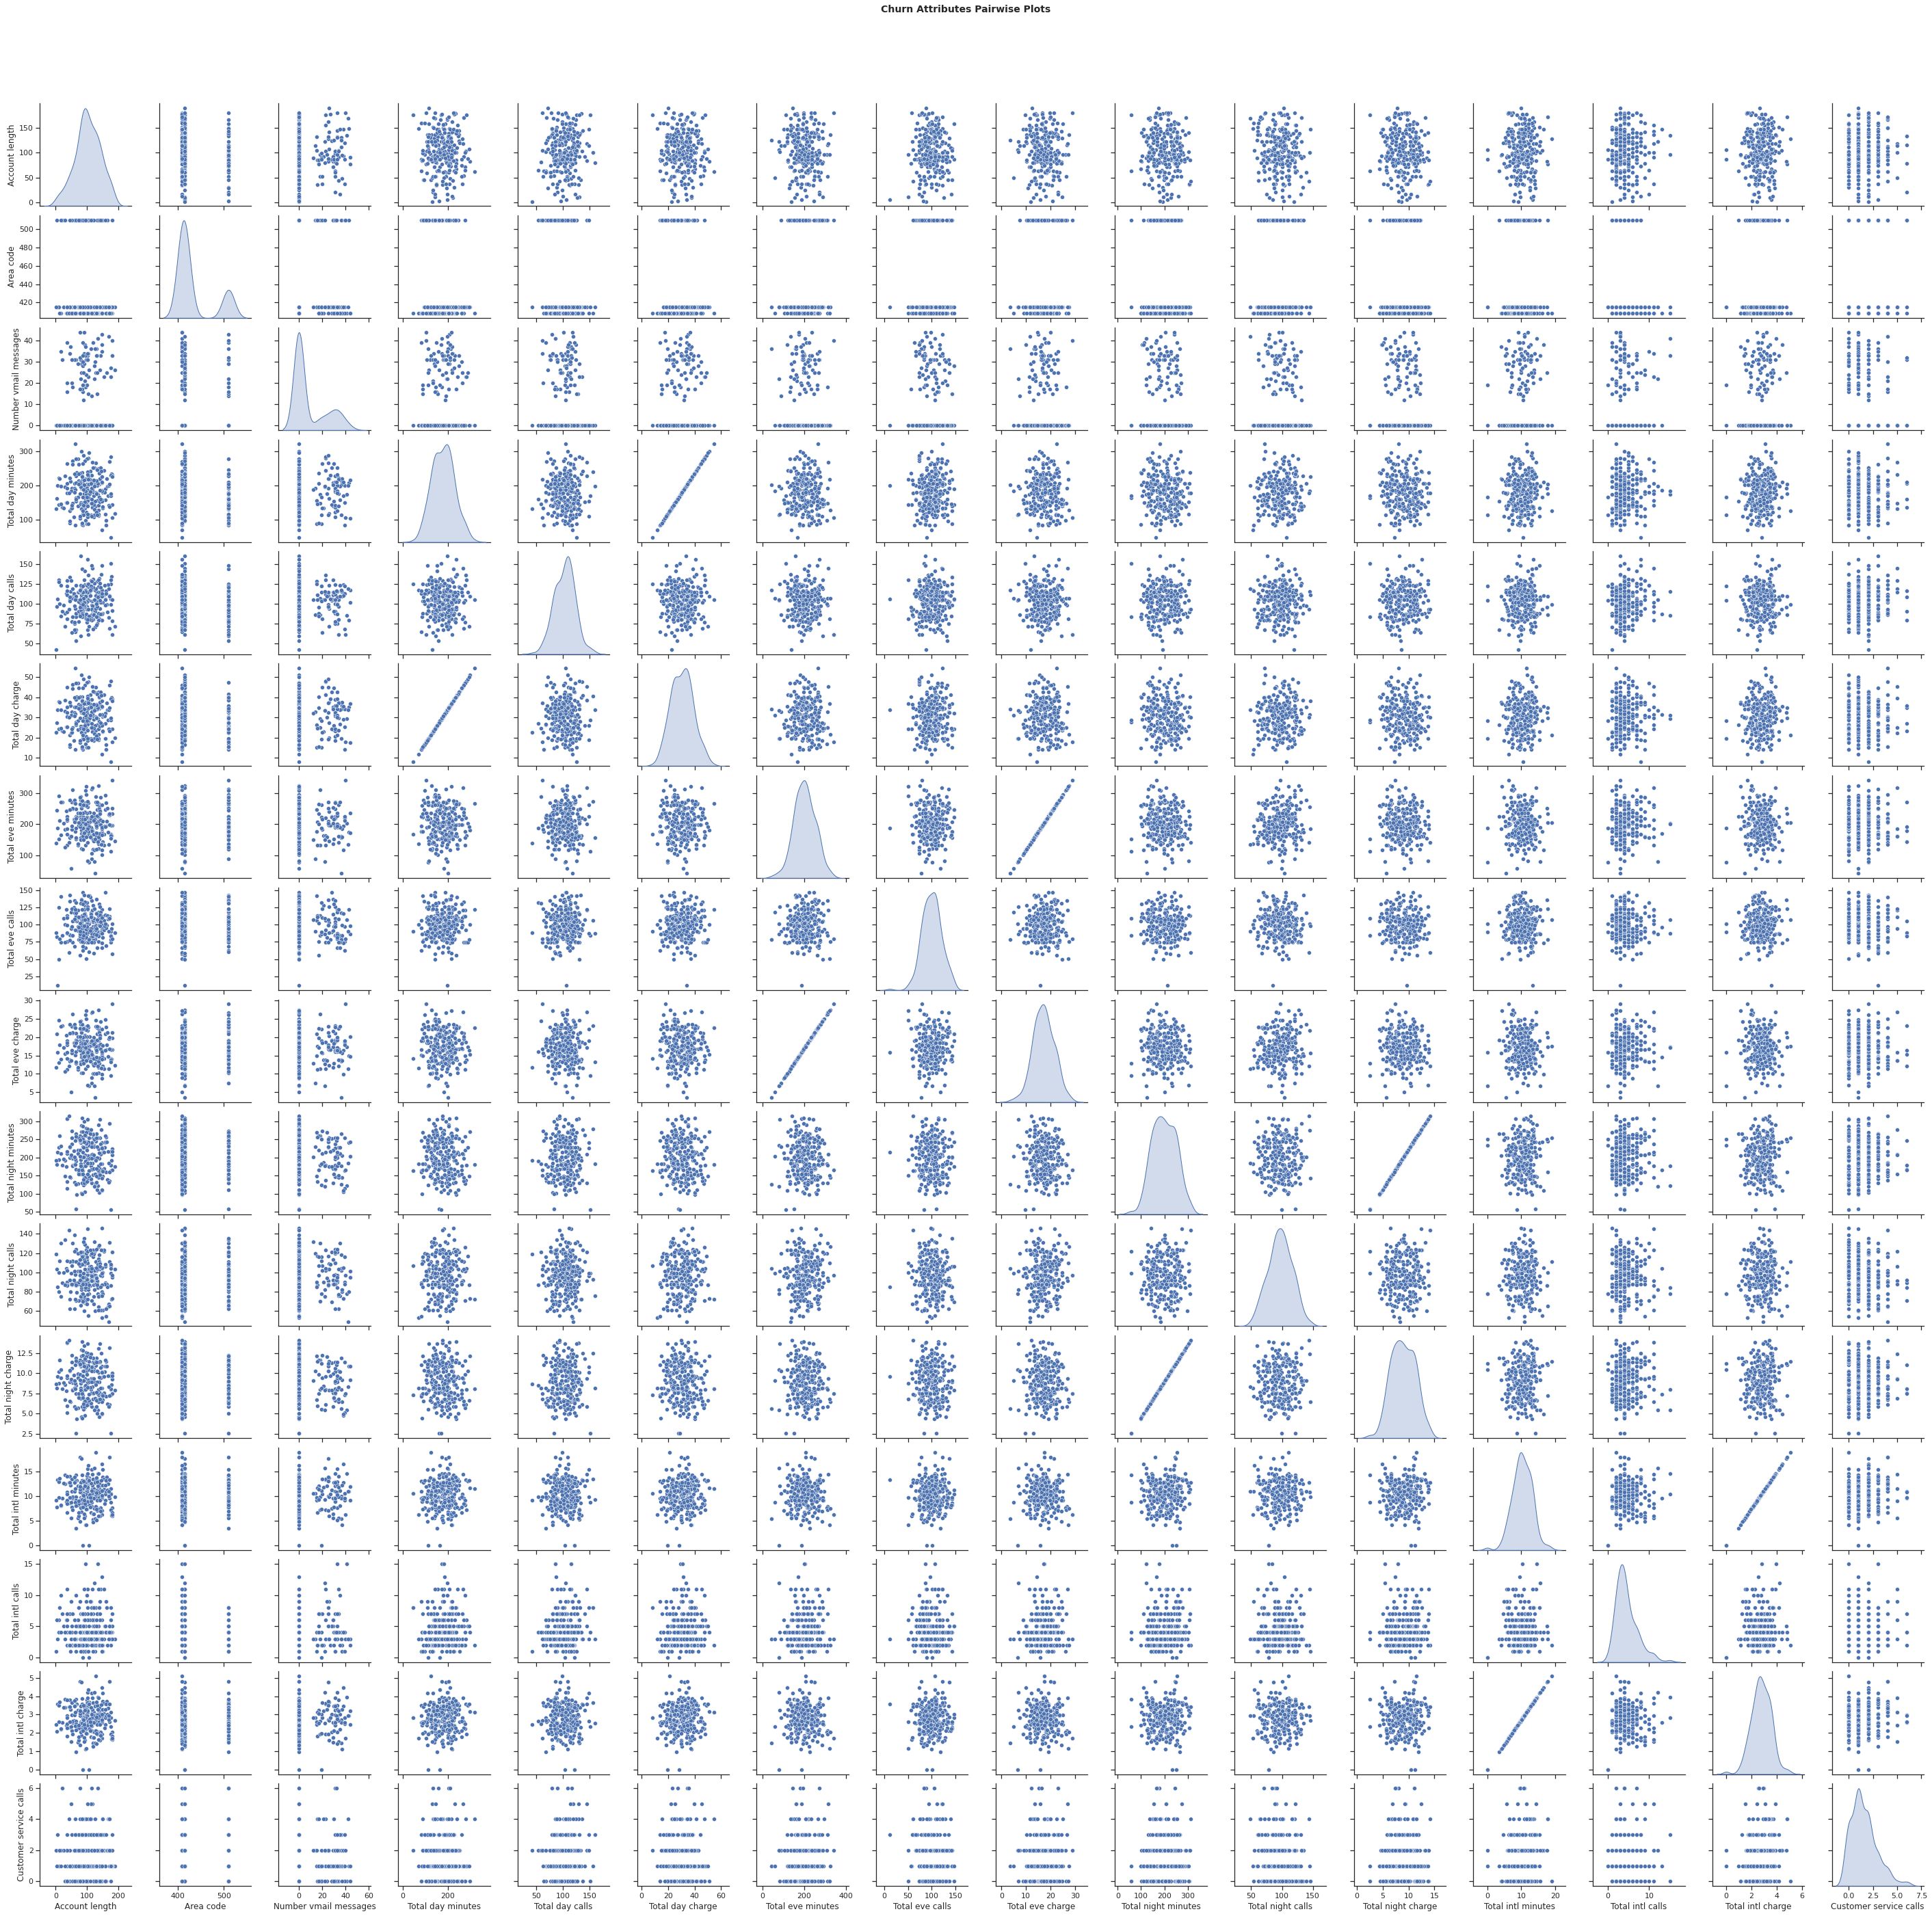

In [0]:
import seaborn as sns
sns.set(style="ticks")

g = sns.pairplot(sampled_data.toPandas(), diag_kind="kde")
fig = g.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Churn Attributes Pairwise Plots', fontsize=14, fontweight='bold');


In [0]:
def get_data(df, removeCols):
    df = df.drop(*removeCols) \
        .withColumn("Churn", when(df["Churn"] == 'true', 1.0).otherwise(0.0)) \
        .withColumn('International plan', when(df["International plan"] == 'Yes', 1.0).otherwise(0.0)) \
        .withColumn('Voice mail plan', when(df["Voice mail plan"] == 'Yes', 1.0).otherwise(0.0))
    return df
    

In [0]:
from pyspark.sql.functions import split, col, round, when

removeCols = ['State', 'Area code', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']

CV_data = get_data(CV_data, removeCols=removeCols)
final_test_data = get_data(final_test_data, removeCols=removeCols)

In [0]:
import pandas as pd
pd.DataFrame(CV_data.take(5), columns=CV_data.columns).transpose()

0 
 1 
 2 
 3 
 4 
 
 
 
 
 Account length 
 128.0 
 107.0 
 137.0 
 84.0 
 75.0 
 
 
 International plan 
 0.0 
 0.0 
 0.0 
 1.0 
 1.0 
 
 
 Voice mail plan 
 1.0 
 1.0 
 0.0 
 0.0 
 0.0 
 
 
 Number vmail messages 
 25.0 
 26.0 
 0.0 
 0.0 
 0.0 
 
 
 Total day minutes 
 265.1 
 161.6 
 243.4 
 299.4 
 166.7 
 
 
 Total day calls 
 110.0 
 123.0 
 114.0 
 71.0 
 113.0 
 
 
 Total eve minutes 
 197.4 
 195.5 
 121.2 
 61.9 
 148.3 
 
 
 Total eve calls 
 99.0 
 103.0 
 110.0 
 88.0 
 122.0 
 
 
 Total night minutes 
 244.7 
 254.4 
 162.6 
 196.9 
 186.9 
 
 
 Total night calls 
 91.0 
 103.0 
 104.0 
 89.0 
 121.0 
 
 
 Total intl minutes 
 10.0 
 13.7 
 12.2 
 6.6 
 10.1 
 
 
 Total intl calls 
 3.0 
 3.0 
 5.0 
 7.0 
 3.0 
 
 
 Customer service calls 
 1.0 
 1.0 
 0.0 
 2.0 
 3.0 
 
 
 Churn 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0

In [0]:
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.tree import DecisionTree

def labelData(data):
    # label: row[end], features: row[0:end-1]
    return data.rdd.map(lambda row: LabeledPoint(row[-1], row[:-1]))

training_data, testing_data = labelData(CV_data).randomSplit([0.8, 0.2])

print("The two first rows of the training data RDD:")
print(training_data.take(2))
print("============================")

model = DecisionTree.trainClassifier(training_data, numClasses=2, maxDepth=2,
                                     categoricalFeaturesInfo={1:2, 2:2},
                                     impurity='gini', maxBins=32)
print(model.toDebugString())


The two first rows of the training data RDD:
[LabeledPoint(0.0, [128.0,0.0,1.0,25.0,265.1,110.0,197.4,99.0,244.7,91.0,10.0,3.0,1.0]), LabeledPoint(0.0, [137.0,0.0,0.0,0.0,243.4,114.0,121.2,110.0,162.6,104.0,12.2,5.0,0.0])]
DecisionTreeModel classifier of depth 2 with 7 nodes
  If (feature 4 <= 263.1)
   If (feature 12 <= 3.5)
    Predict: 0.0
   Else (feature 12 > 3.5)
    Predict: 1.0
  Else (feature 4 > 263.1)
   If (feature 2 in {1.0})
    Predict: 0.0
   Else (feature 2 not in {1.0})
    Predict: 1.0



In [0]:
print("Feature 12 is the {}.".format(CV_data.columns[12]))
print("Feature 4 is the {}.".format(CV_data.columns[4]))

Feature 12 is the Customer service calls.
Feature 4 is the Total day minutes.


In [0]:
def printAllMetrics(predictionsDF):
    TP = predictionsDF.select("label", "predictedLabel").filter("label == 1.0 and predictedLabel == 1.0").count()
    FN = predictionsDF.select("label", "predictedLabel").filter("label == 1.0 and predictedLabel == 0.0").count()
    TN = predictionsDF.select("label", "predictedLabel").filter("label == 0.0 and predictedLabel == 0.0").count()
    FP = predictionsDF.select("label", "predictedLabel").filter("label == 0.0 and predictedLabel == 1.0").count()

    precision_p   = TP/(TP+FP)
    precision_n   = TN/(TN+FN)
    recall_p      = TP/(TP+FN)
    recall_n      = TN/(TN+FP)
    f1_p          = 2*precision_p*recall_p/(precision_p+recall_p)
    f1_n          = 2*precision_n*recall_n/(precision_n+recall_n)
    avg_precision = (precision_p*(TP+FN)+precision_n*(TN+FP))/(TP+FN+TN+FP)
    avg_recall    = (recall_p*(TP+FN)+recall_n*(TN+FP))/(TP+FN+TN+FP)
    avg_f1        = (f1_p*(TP+FN)+f1_n*(TN+FP))/(TP+FN+TN+FP)
    accuracy      = (TN+TP)/(TP+FN+TN+FP)

    print('Precision of True    ', precision_p)
    print('Precision of False   ', precision_n)
    print('** Avg Precision     ', avg_precision)
    print('Recall of True       ', recall_p)
    print('Recall of False      ', recall_n)
    print('** Avg Recall        ', avg_recall)
    print('F1 of True           ', f1_p)
    print('F1 of False          ', f1_n)
    print('** Avg F1            ', avg_f1)
    print('** Accuracy          ', accuracy)

In [0]:
from pyspark.mllib.evaluation import MulticlassMetrics

def getPredictionsLabels(model, test_data):
    predictions = model.predict(test_data.map(lambda r: r.features))
    return predictions.zip(test_data.map(lambda r: r.label))

def printMetrics(predictions_and_labels):
    metrics = MulticlassMetrics(predictions_and_labels)
    print('Confusion Matrix\n', metrics.confusionMatrix().toArray())
    print('Precision of True    ', metrics.precision(1))
    print('Precision of False   ', metrics.precision(0))
    print('Weighted Precision   ', metrics.weightedPrecision)
    print('Recall of True       ', metrics.recall(1))
    print('Recall of False      ', metrics.recall(0))
    print('Weighted Recall      ', metrics.weightedRecall) 
    print('FMeasure of True     ', metrics.fMeasure(1.0, 1.0))
    print('FMeasure of False    ', metrics.fMeasure(0.0, 1.0))
    print('Weighted fMeasure    ', metrics.weightedFMeasure())
    print('Accuracy             ', metrics.accuracy)

predictions_and_labels = getPredictionsLabels(model, testing_data)

printMetrics(predictions_and_labels)

/databricks/spark/python/pyspark/sql/context.py:165: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Confusion Matrix
 [[423.  25.]
 [ 39.  30.]]
Precision of True     0.5454545454545454
Precision of False    0.9155844155844156
Weighted Precision    0.8661860383330403
Recall of True        0.43478260869565216
Recall of False       0.9441964285714286
Weighted Recall       0.8762088974854932
FMeasure of True      0.48387096774193544
FMeasure of False     0.9296703296703297
Weighted fMeasure     0.8701729293355923
Accuracy              0.8762088974854932


In [0]:
predictionsdf = predictions_and_labels.toDF(["predictedLabel","label"])

predictionsdf.groupBy('label', 'predictedLabel').count().show()
print("========================================")

printAllMetrics(predictionsdf)

+-----+--------------+-----+
|label|predictedLabel|count|
+-----+--------------+-----+
|  1.0|           1.0|   30|
|  0.0|           1.0|   25|
|  1.0|           0.0|   39|
|  0.0|           0.0|  423|
+-----+--------------+-----+

Precision of True     0.5454545454545454
Precision of False    0.9155844155844156
** Avg Precision      0.8661860383330403
Recall of True        0.43478260869565216
Recall of False       0.9441964285714286
** Avg Recall         0.8762088974854932
F1 of True            0.48387096774193544
F1 of False           0.9296703296703297
** Avg F1             0.8701729293355923
** Accuracy           0.8762088974854932


In [0]:
CV_data.groupby('Churn').count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|  0.0| 2278|
|  1.0|  388|
+-----+-----+



In [0]:
stratified_CV_data = CV_data.sampleBy('Churn', fractions={0: CV_data.select("Churn").where('Churn == 1').count()/
                                                          CV_data.select("Churn").where('Churn == 0').count(), 1: 1.0}, seed = 5323)

stratified_CV_data.groupby('Churn').count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|  0.0|  388|
|  1.0|  388|
+-----+-----+



In [0]:
training_data, testing_data = labelData(stratified_CV_data).randomSplit([0.8, 0.2])

model = RandomForest.trainClassifier(training_data, numClasses=2, maxDepth=2, numTrees=10,
                                     categoricalFeaturesInfo={1:2, 2:2},
                                     impurity='gini', maxBins=32)

predictions_and_labels = getPredictionsLabels(model, testing_data)
printMetrics(predictions_and_labels)

print("========================================")

predictionsdf = predictions_and_labels.toDF(["predictedLabel","label"])
printAllMetrics(predictionsdf)

Confusion Matrix
 [[85. 11.]
 [19. 60.]]
Precision of True     0.8450704225352113
Precision of False    0.8173076923076923
Weighted Precision    0.8298405819532579
Recall of True        0.759493670886076
Recall of False       0.8854166666666666
Weighted Recall       0.8285714285714286
FMeasure of True      0.8
FMeasure of False     0.85
Weighted fMeasure     0.8274285714285714
Accuracy              0.8285714285714286
Precision of True     0.8450704225352113
Precision of False    0.8173076923076923
** Avg Precision      0.8298405819532579
Recall of True        0.759493670886076
Recall of False       0.8854166666666666
** Avg Recall         0.8285714285714286
F1 of True            0.8
F1 of False           0.85
** Avg F1             0.8274285714285715
** Accuracy           0.8285714285714286


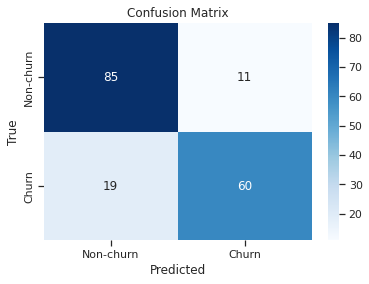

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

predictions = predictions_and_labels.map(lambda x: (x[0], x[1])).collect()
predictions_np = np.array(predictions)
actual_labels = predictions_np[:, 1]
predicted_labels = predictions_np[:, 0]

cm = confusion_matrix(actual_labels, predicted_labels)

plot_confusion_matrix(cm, ['Non-churn', 'Churn'])


In [0]:
stratified_CV_data.show(2)

+--------------+------------------+---------------+---------------------+-----------------+---------------+-----------------+---------------+-------------------+-----------------+------------------+----------------+----------------------+-----+
|Account length|International plan|Voice mail plan|Number vmail messages|Total day minutes|Total day calls|Total eve minutes|Total eve calls|Total night minutes|Total night calls|Total intl minutes|Total intl calls|Customer service calls|Churn|
+--------------+------------------+---------------+---------------------+-----------------+---------------+-----------------+---------------+-------------------+-----------------+------------------+----------------+----------------------+-----+
|           118|               1.0|            0.0|                    0|            223.4|             98|            220.6|            101|              203.9|              118|               6.3|               6|                     0|  0.0|
|            73|    

In [0]:
from pyspark.ml.feature import StringIndexer, VectorIndexer, VectorAssembler
from pyspark.ml import Pipeline

def get_dummy(df, numericCols, labelCol):
    # Combining a given list of columns into a single vector column features
    assembler = VectorAssembler(inputCols=numericCols, outputCol="features")

    # Index labels, adding metadata to the label column
    indexer = StringIndexer(inputCol=labelCol, outputCol='indexedLabel')

    # Automatically identify categorical features and index them
    featureIndexer = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=2)

    pipeline = Pipeline(stages = [assembler] + [indexer] + [featureIndexer])

    model = pipeline.fit(df)
    data = model.transform(df)

    data = data.withColumn('label', col(labelCol))

    return data.select('features', 'label', 'indexedFeatures', 'indexedLabel')

In [0]:
numericCols = stratified_CV_data.columns
numericCols.remove("Churn")

vectorized_CV_data = get_dummy(CV_data, numericCols, "Churn")
vectorized_stratified_CV_data = get_dummy(stratified_CV_data, numericCols, "Churn")
vectorized_final_test_data = get_dummy(final_test_data, numericCols, "Churn")

In [0]:
vectorized_stratified_CV_data.show(2, False)

+------------------------------------------------------------------+-----+------------------------------------------------------------------+------------+
|features                                                          |label|indexedFeatures                                                   |indexedLabel|
+------------------------------------------------------------------+-----+------------------------------------------------------------------+------------+
|[118.0,1.0,0.0,0.0,223.4,98.0,220.6,101.0,203.9,118.0,6.3,6.0,0.0]|0.0  |[118.0,1.0,0.0,0.0,223.4,98.0,220.6,101.0,203.9,118.0,6.3,6.0,0.0]|0.0         |
|[73.0,0.0,0.0,0.0,224.4,90.0,159.5,88.0,192.8,74.0,13.0,2.0,1.0]  |0.0  |[73.0,0.0,0.0,0.0,224.4,90.0,159.5,88.0,192.8,74.0,13.0,2.0,1.0]  |0.0         |
+------------------------------------------------------------------+-----+------------------------------------------------------------------+------------+
only showing top 2 rows



In [0]:
def cvComparing(vectorized_train_data, vectorized_test_data, classifiers, paramGrid, numFolds, roundLevel, seed):
    names = []
    underROC_train = []
    underROC_test = []
    f1_train = []
    f1_test = []
    wp_train = []
    wp_test = []
    wr_train = []
    wr_test = []
    acc_train = []
    acc_test = []

    evaluatorB = BinaryClassificationEvaluator(rawPredictionCol="prediction", labelCol="indexedLabel")

    evaluatorf1 = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="f1") 
    evaluatorwp = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="weightedPrecision") 
    evaluatorwr = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="weightedRecall") 
    evaluatoracc = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy") 

    for name, clf in classifiers:
        cv = CrossValidator(estimator=clf, estimatorParamMaps=paramGrid, evaluator=evaluatorf1, numFolds=numFolds, seed=seed, collectSubModels=True)
        cvModel = cv.fit(vectorized_train_data)  
        predict_train = cvModel.transform(vectorized_train_data)
        predict_test = cvModel.transform(vectorized_test_data)
        underROC_train.append(evaluatorB.evaluate(predict_train))
        underROC_test.append(evaluatorB.evaluate(predict_test))
        f1_train.append(evaluatoracc.evaluate(predict_train))
        f1_test.append(evaluatoracc.evaluate(predict_test))
        wp_train.append(evaluatorwp.evaluate(predict_train))
        wp_test.append(evaluatorwp.evaluate(predict_test))
        wr_train.append(evaluatorwr.evaluate(predict_train))
        wr_test.append(evaluatorwr.evaluate(predict_test))
        acc_train.append(evaluatoracc.evaluate(predict_train))
        acc_test.append(evaluatoracc.evaluate(predict_test))
        names.append(name)

    cvResults = spark.createDataFrame(zip(names, underROC_train, underROC_test, acc_train, acc_test, f1_train, f1_test, wp_train, wp_test, wr_train, wr_test), 
                                       schema=['Classifier name', 'underROC_train', 'underROC_test', 'Accuracy_train', 'Accuracy_test', 'f1_train', 'f1_test', 'wPrecision_train', 'wPrecision_test', 'wRecall_train', 'wRecall_test'])
  
    for t in cvResults.dtypes:
        if t[1] == 'double':
            cvResults = cvResults.withColumn(t[0], round(cvResults[t[0]], roundLevel))
  
    return cvResults

In [0]:
from pyspark.ml.classification import NaiveBayes, RandomForestClassifier, GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

paramGrid = ParamGridBuilder().build()

classifiers = []
##############################################
classifiers.append(('NB', NaiveBayes(labelCol='indexedLabel', featuresCol='indexedFeatures')))
classifiers.append(('RF', RandomForestClassifier(labelCol='indexedLabel', featuresCol='indexedFeatures')))
classifiers.append(('GBT', GBTClassifier(labelCol='indexedLabel', featuresCol='indexedFeatures')))
##############################################


cvResults_CV_data = cvComparing(vectorized_train_data=vectorized_CV_data, vectorized_test_data=vectorized_final_test_data, 
                                classifiers=classifiers, paramGrid=paramGrid, numFolds=5, roundLevel=3, seed=123)

cvResults_stratified_CV_data = cvComparing(vectorized_train_data=vectorized_stratified_CV_data, 
                                           vectorized_test_data=vectorized_final_test_data, classifiers=classifiers, 
                                           paramGrid=paramGrid, numFolds=5, roundLevel=3, seed=123)



In [0]:
cvResults_CV_data.toPandas().set_index('Classifier name')

underROC_train 
 underROC_test 
 Accuracy_train 
 Accuracy_test 
 f1_train 
 f1_test 
 wPrecision_train 
 wPrecision_test 
 wRecall_train 
 wRecall_test 
 
 
 Classifier name 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 NB 
 0.610 
 0.610 
 0.632 
 0.625 
 0.632 
 0.625 
 0.800 
 0.804 
 0.632 
 0.625 
 
 
 RF 
 0.840 
 0.802 
 0.950 
 0.939 
 0.950 
 0.939 
 0.950 
 0.938 
 0.950 
 0.939 
 
 
 GBT 
 0.921 
 0.859 
 0.976 
 0.954 
 0.976 
 0.954 
 0.976 
 0.953 
 0.976 
 0.954

In [0]:
cvResults_stratified_CV_data.toPandas().set_index('Classifier name')

underROC_train 
 underROC_test 
 Accuracy_train 
 Accuracy_test 
 f1_train 
 f1_test 
 wPrecision_train 
 wPrecision_test 
 wRecall_train 
 wRecall_test 
 
 
 Classifier name 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 NB 
 0.602 
 0.607 
 0.602 
 0.537 
 0.602 
 0.537 
 0.603 
 0.810 
 0.602 
 0.537 
 
 
 RF 
 0.889 
 0.878 
 0.889 
 0.889 
 0.889 
 0.889 
 0.892 
 0.918 
 0.889 
 0.889 
 
 
 GBT 
 0.947 
 0.862 
 0.947 
 0.921 
 0.947 
 0.921 
 0.952 
 0.925 
 0.947 
 0.921

In [0]:
evaluatorf1 = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="f1") 
evaluatorwp = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="weightedPrecision") 
evaluatorwr = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="weightedRecall") 
evaluatorac = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy") 

clf = NaiveBayes(labelCol='indexedLabel', featuresCol='indexedFeatures')

clfModel = clf.fit(vectorized_stratified_CV_data)  
pred_train = clfModel.transform(vectorized_stratified_CV_data)

print('Weighted Precision   ', evaluatorwp.evaluate(pred_train))
print('Weighted Recall      ', evaluatorwr.evaluate(pred_train))
print('F1                   ', evaluatorf1.evaluate(pred_train))
print('Accuracy             ', evaluatorac.evaluate(pred_train))

print("========================================")

printAllMetrics(pred_train.withColumn('predictedLabel', col("prediction")))

Weighted Precision    0.6033201874136246
Weighted Recall       0.6018041237113402
F1                    0.6003380185910225
Accuracy              0.6018041237113402
Precision of True     0.5908045977011495
Precision of False    0.6158357771260997
** Avg Precision      0.6033201874136246
Recall of True        0.6623711340206185
Recall of False       0.5412371134020618
** Avg Recall         0.6018041237113402
F1 of True            0.6245443499392467
F1 of False           0.5761316872427983
** Avg F1             0.6003380185910225
** Accuracy           0.6018041237113402


Naive Bayes ROC AUC: 0.6070022083179978


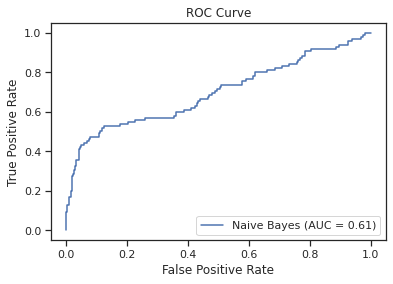

Random Forest ROC AUC: 0.8782572690467427


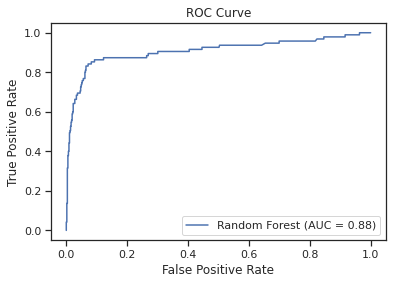

Gradient Boosted Tree ROC AUC: 0.8615016562384984


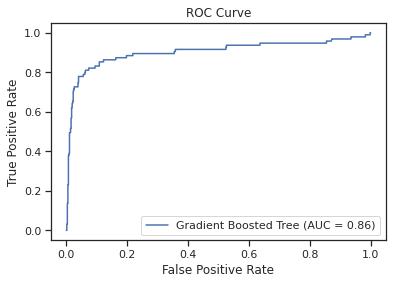

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from sklearn.metrics import roc_curve

def fit_and_plot_roc(model_name, classifier, train_data, test_data):
 
    model = classifier.fit(train_data)
    
    predictions = model.transform(test_data)

    evaluator = BinaryClassificationEvaluator(labelCol="indexedLabel", rawPredictionCol="prediction", metricName="areaUnderROC")
    roc_auc = evaluator.evaluate(predictions)

    print(f'{model_name} ROC AUC: {roc_auc}')
    
    preds_and_labels = predictions.select('probability', 'indexedLabel').rdd.map(lambda row: (float(row['probability'][1]), float(row['indexedLabel'])))
    preds_and_labels = preds_and_labels.collect()
 
    preds, labels = zip(*preds_and_labels)

    fpr, tpr, thresholds = roc_curve(labels, preds)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

classifiers = [
    ('Naive Bayes', NaiveBayes(labelCol='indexedLabel', featuresCol='indexedFeatures')),
    ('Random Forest', RandomForestClassifier(labelCol='indexedLabel', featuresCol='indexedFeatures')),
    ('Gradient Boosted Tree', GBTClassifier(labelCol='indexedLabel', featuresCol='indexedFeatures'))
]

for model_name, classifier in classifiers:
    fit_and_plot_roc(model_name, classifier, vectorized_stratified_CV_data, vectorized_final_test_data)

Naive Bayes ROC AUC: 0.6070022083179978
Random Forest ROC AUC: 0.8782572690467427
Gradient Boosted Tree ROC AUC: 0.8615016562384984


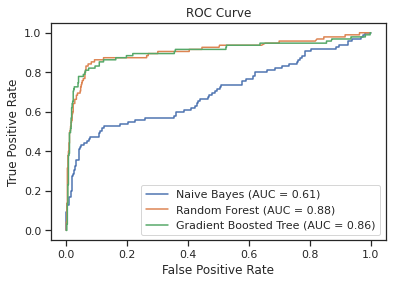

In [0]:
from pyspark.ml.feature import VectorAssembler

def fit_and_plot_roc(classifiers, train_data, test_data):
    for model_name, classifier in classifiers:
        model = classifier.fit(train_data)
        predictions = model.transform(test_data)

        evaluator = BinaryClassificationEvaluator(labelCol="indexedLabel", rawPredictionCol="prediction", metricName="areaUnderROC")
        roc_auc = evaluator.evaluate(predictions)

        print(f'{model_name} ROC AUC: {roc_auc}')

        preds_and_labels = predictions.select('probability', 'indexedLabel').rdd.map(lambda row: (float(row['probability'][1]), float(row['indexedLabel'])))
        preds_and_labels = preds_and_labels.collect()

        preds, labels = zip(*preds_and_labels)

        fpr, tpr, thresholds = roc_curve(labels, preds)

        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Define classifiers
classifiers = [
    ('Naive Bayes', NaiveBayes(labelCol='indexedLabel', featuresCol='indexedFeatures')),
    ('Random Forest', RandomForestClassifier(labelCol='indexedLabel', featuresCol='indexedFeatures')),
    ('Gradient Boosted Tree', GBTClassifier(labelCol='indexedLabel', featuresCol='indexedFeatures'))
]

# Call the function to fit classifiers, compute ROC AUC, and plot ROC curve
fit_and_plot_roc(classifiers, vectorized_stratified_CV_data, vectorized_final_test_data)


In [0]:
def evaluate_model(classifier, train_data, test_data):
 
    model = classifier.fit(train_data)

    predictions = model.transform(test_data)

    evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
    accuracy = evaluator.evaluate(predictions)
    
    return accuracy

classifiers = [
    ('Naive Bayes', NaiveBayes(labelCol='indexedLabel', featuresCol='indexedFeatures')),
    ('Random Forest', RandomForestClassifier(labelCol='indexedLabel', featuresCol='indexedFeatures')),
    ('Gradient Boosted Tree', GBTClassifier(labelCol='indexedLabel', featuresCol='indexedFeatures'))
]

for model_name, classifier in classifiers:
    accuracy = evaluate_model(classifier, vectorized_stratified_CV_data, vectorized_final_test_data)
    print(f'{model_name} Accuracy: {accuracy * 100:.2f}%')
   

Naive Bayes Accuracy: 53.67%
Random Forest Accuracy: 88.91%
Gradient Boosted Tree Accuracy: 92.05%
